# Анализ оттока клиентов для сети фитнес-клубов

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Нужно:

    - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    - проанализировать основные признаки, наиболее сильно влияющие на отток;
    - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.


### Данные

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

    - 'gender' — пол;
    - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - 'Phone' — наличие контактного телефона;
    - 'Age' — возраст;
    - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

    - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    - 'Group_visits' — факт посещения групповых занятий;
    - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    - 'Churn' — факт оттока в текущем месяце.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Данные</a></span></li></ul></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Статистические-параметры-признаков" data-toc-modified-id="Статистические-параметры-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Статистические параметры признаков</a></span></li><li><span><a href="#Средние-значения-признаков-в-зависимости-от-группы-оттока." data-toc-modified-id="Средние-значения-признаков-в-зависимости-от-группы-оттока.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Средние значения признаков в зависимости от группы оттока.</a></span></li><li><span><a href="#Гистограммы-признаков" data-toc-modified-id="Гистограммы-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Гистограммы признаков</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Корреляция признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Прогнозирование-оттока" data-toc-modified-id="Прогнозирование-оттока-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Прогнозирование оттока</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт библиотек

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

## Знакомство с данными

Ознакомимся с данными:

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Пропусков нет, приведем названия столбцов к удобному стилю и столбец "Month_to_end_contract" к целому типу данных:

In [3]:
data.columns = data.columns.str.lower()
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


## Изучение данных

Подробнее изучим все признаки:

### Статистические параметры признаков

In [4]:
data.describe(include='all')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Мы видим:

    1) Практически равномерное распределение по гендеру;
    2) Сильное преобладание тех, кто живет или работает рядом с фитнес-центром;
    3) Практически равные количества сотрудников и не сотрудников компаний-партнеров;
    4) Промо-коды "приведи друга" использовали всего 31% посетителей;
    5) Номер телефона оставляют 90% посетителей;
    6) Больше половины постетителей оформляют абонемент всего на 1 месяц. Но более длинных абонементов достаточно, чтобы скосить среднее до 4.7 месяцев;
    7) 41% посетителей посещали групповые занятия;
    8) Средний возраст посетителя -- 29 лет. Разброс при этом от 18 до 41 года, и распределение достаточно равномерно -- среднее практически совпадает с медианой;
    9) В среднем тратят около 147 у.е. на дополнительные услуги фитнес-центра, и это значение недалеко от медианного. Так же наблюдаются клиенты которые тратят в 3 раза больше среднего;
    10) Срок до окончания действия абонемента сильно напоминает столбец срока абонемента в целом, что закономерно. Возможно данные признаки будут сильно коррелировать;
    11) Лайфтайм клиентов от 0 до 31 месяцев. В среднем около 3-4. Учитывая что данные у нас за месяц мы знаем что предыдущие месяцы клиент был активен, иначе бы его записали в более ранний отток. Можно сделать вывод, что около 50% клиентов держатся 3 и меньше месяца, 75% -- до 5 месяцев, а вот в оставшихся есть постоянные клиенты, которые ходят в центр уже несколько лет;
    12) В среднем за все время действия абонемента посетители занимаются около 2 раз в неделю, это же справедливая цифра для половины клиентов. Но есть и любители спорта, посещающие зал по 6 раз;
    13) Те же цифры справдливы и для данных за последний месяц. Значит клиенты достаточно предсказуемы;
    14) Около 27% клиентов попало в отток -- перестало ходить на занятия. Нам еще предстоит выяснить как "выглядят" эти клиенты.

### Средние значения признаков в зависимости от группы оттока.

Посмотрим на средние значения признаков по группам оттока:

In [5]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Мы можем обнаружить такие закономерности:

    1) Гендерное разделение не поменялось: 50/50 для обеих групп;
    2) Среди оставшихся несколько больше тех, кто живет или работает рядом с фитнес-центром;
    3) Доля участников партнерской программы среди оставшихся больше на 20%;
    4) Пришедших по скидке "приведи друга" среди оставшихся так же больше;
    5) 90% клиентов обеих групп оставляют контактный номер телефона;
    6) В среднем абонементы у оставшихся длиннее -- 6 месяцев в сравнении с 2;
    7) Оставшиеся клиенты скорее посещали групповые занятия;
    8) Оставшиеся клиенты в среднем немного старше ушедших;
    9) Оставшиеся клиенты чуть больше тратили на допуслуги;
    10) У оставшихся клиентов в среднем абонемент будет действовать еще 5 месяцев, в то время как у ушедших 1-2;
    11) Похожая картина в лайфтайме: 5 месяцев против 1. Все вместе данные по времени дают понять: отток в основном происходит в первые пару месяцев посещения. Задержавшиеся дольше клиенты чаще продолжают пользоваться услугами фитнес-центра.
    12) Оставшиеся клиенты чуть чаще посещают фитнес-центр за все время: 2 раза против 1.5 в неделю.
    13) Так же и для статистики за последний месяц. Только тут ушедшие клиенты посещали зал 1 раз в неделю в среднем.
    
На данный момент мы можем предположить что наибольший вклад будет у признаков связанных с временными рамками: сроком действия абонемента, периодом общего клиентства фитнес-клуба.

### Гистограммы признаков

Построим гистограммы для признаков по группам оттока для всех признаков кроме бинарных(с ними картина и так ясна):

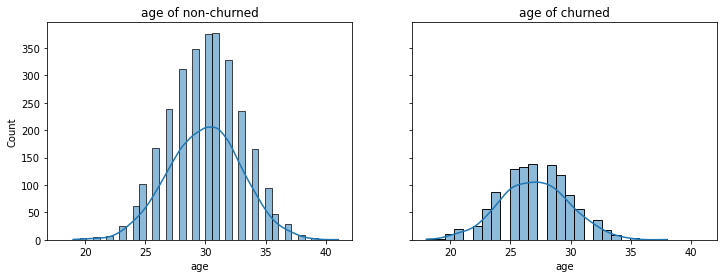

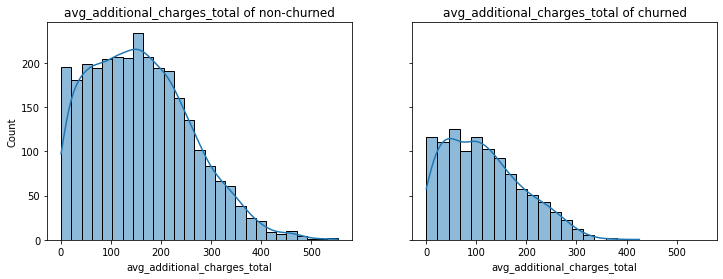

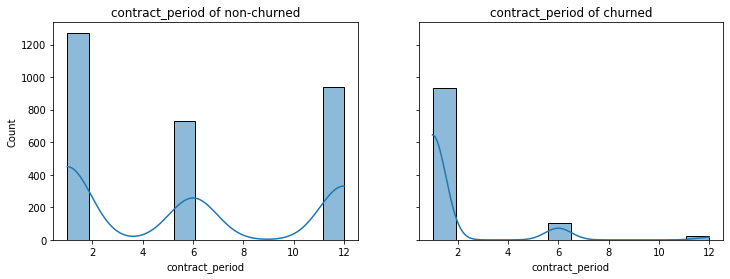

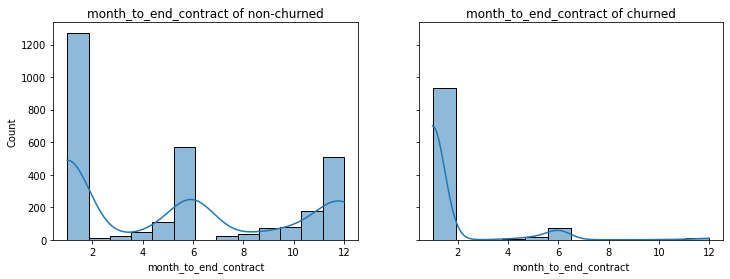

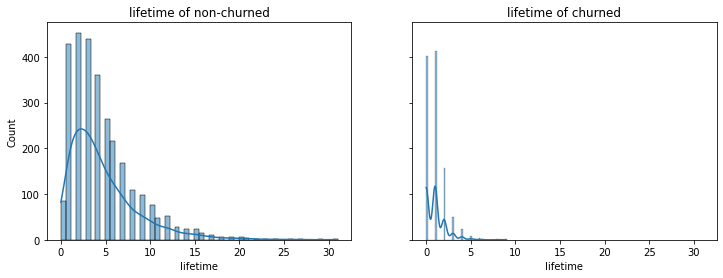

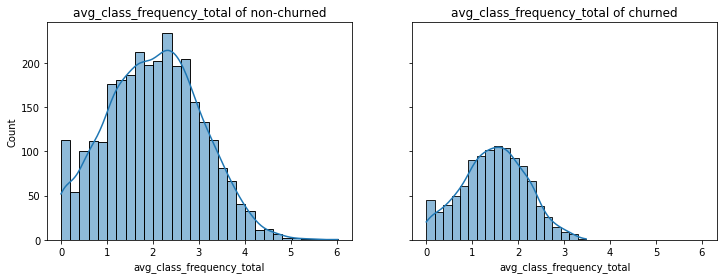

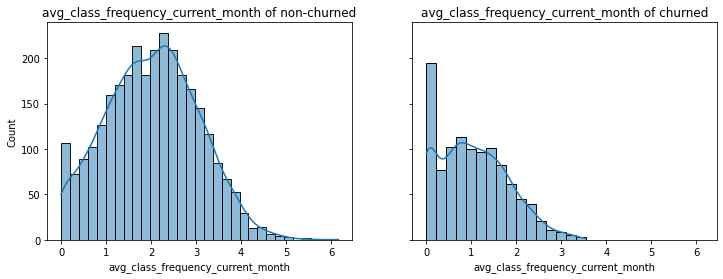

In [6]:
hist_columns = ['age',
                 'avg_additional_charges_total',
                 'contract_period',
                 'month_to_end_contract',
                 'lifetime',
                 'avg_class_frequency_total',
                 'avg_class_frequency_current_month']

for name in hist_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
    ax1.set_title(name + ' of non-churned')
    sns.histplot(data=data.query('churn == 0')[name], kde=True, ax=ax1)
    ax2.set_title(name + ' of churned')
    sns.histplot(data=data.query('churn == 1')[name], kde=True, ax=ax2)
    plt.show()
    

Наблюдения из графиков:

    1) Для ообеих групп распределение по возрасту похоже на нормальное;
    2) Распределения трат нормальные, с обрывом слева, на нуле. Оставшиеся клиенты тратят больше;
    3) Абонементы продаются только трех типов: на 1, 6 и 12 ммесяцев. Оставшиеся клиенты чаще берут абонемент на 1 или 12 месяцев, несколько реже -- на 6. В отток же практически всегда уходят те, кто купили абонемент на 1 месяц;
    4) И уходят они обычно на 1 месяце. Однако график оставшихся клиентов вызывает вопросы. Здесь же мы видим три явных пика, будто бы в основном у нас клиенты купившие абонемент в этом месяце. Возможно сейчас был сезон скидок. Либо клиенты в основном ходят в зал только первый месяц абонемента. Либо наша выборка не совсем корректна.
    5) Лайфтайм при этом вполне равномерный, для обеих групп;
    6-7) Графики посещаемости близки к нормальным с обрывом слева. Что интересно -- в оттоке бОльшая часть людей последний месяц не посещало занятий, однако не все. Часть видимо закрыла контракт.

### Корреляция признаков

Построим матрицу корреляций признаков:

In [7]:
data.corr().style.format('{:.2f}')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
near_location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
avg_additional_charges_total,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
month_to_end_contract,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


Для большей наглядности построим хитмэп, причем с модулями корреляций -- так зависимости будут заметнее.

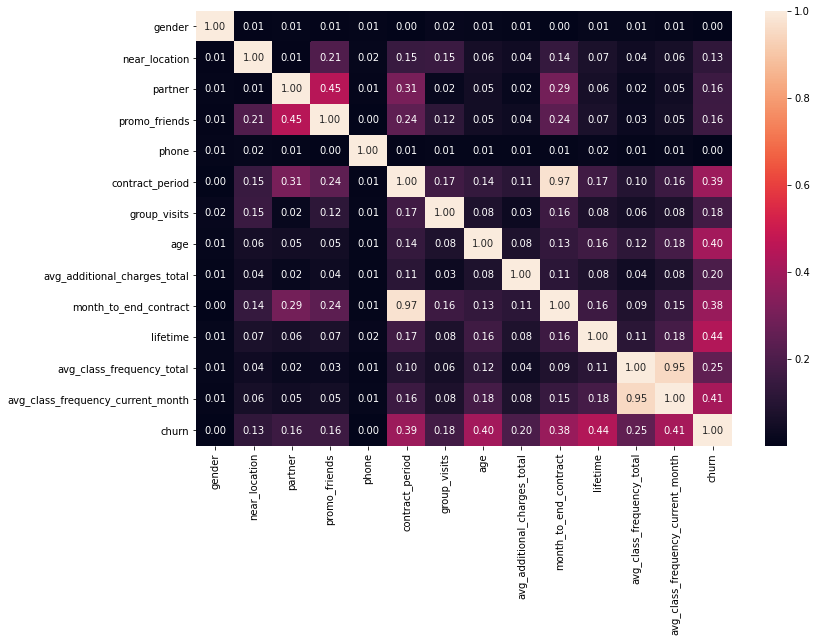

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr().abs(), annot=True, fmt='.2f');

Среди нецелевых признаков мы наблюдаем сильную корреляцию между оставшимся сроком действия абонемента и его длительностью. Выходит действительно больше всего клиентов выборки -- на первом месяце абонемента. Так же сильно коррелируют месячная и общая посещаемость, и заметно коррелируют скидки компаний-партнеров и "приведи друга".

С целевым же признаком заметно коррелируют: длительность абонемента, возраст, время до конца контракта, лайфтайм и посещаемость.Причем все из них коррелируют отрицательно -- чем больше эти величины тем скорее клиент не уйдет в отток.

### Вывод

Мы выделили основные признаки, влияющие на отток клиентов:

    - длительность абонемента и время до конца его действия(практически одинаковые величины)
    - возраст клиента
    - посещаемость
    - лайфтайм

## Прогнозирование оттока

Разделим данные на обучающую и валидационную выборку:

In [9]:
X = data.drop(['churn'], axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем выборки:

In [10]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель логистической регрессии:

In [11]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train_st, y_train)
y_pred_log = log_model.predict(X_test_st) 

Обучим модель случайного леса:

In [12]:
forest_model = RandomForestClassifier(n_estimators = 100, random_state=0)
forest_model.fit(X_train_st, y_train)
y_pred_forest = forest_model.predict(X_test_st) 

Напишем функцию рассчета метрик и посмотрим на них для двух моделей:

In [13]:
def get_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('For ', model_name, (':\n\taccuracy is: {:.2f} \n\tprecision is: {:.2f} \n\trecall is: {:.2f}'
                               .format(acc, precision, recall)), sep='')
    
get_metrics(y_test, y_pred_log, 'Logistic Regression')
get_metrics(y_test, y_pred_forest, 'Random Forest Classifier')

For Logistic Regression:
	accuracy is: 0.92 
	precision is: 0.85 
	recall is: 0.83
For Random Forest Classifier:
	accuracy is: 0.92 
	precision is: 0.84 
	recall is: 0.81


Алгоритм логистической регрессии показал себя чуть лучше.

### Вывод

Мы обучили алгоритм и теперь можем прогнозировать отток клиентов в будущем.

## Кластеризация клиентов

Построим матрицу расстояний и нарисуем дендограмму клиентов:

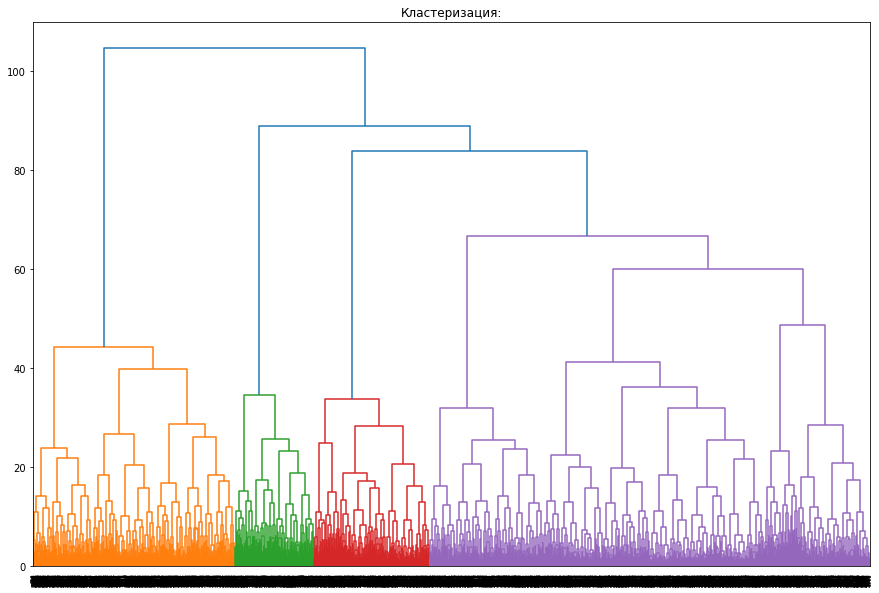

In [14]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Кластеризация:')
plt.show()

Алгоритм предлагает оптимальное количество кластеров: 4. Мы попробуем разделить наши данные на 5.

In [15]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_sc)

In [16]:
data['groups'] = labels
data.groupby('groups').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
groups,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


In [17]:
data.groupby('groups').count()['gender']

groups
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

Можно сразу выделить признаки, которые для всех кластеров примерно одинаковы:

    - гендер;
    - возраст;
    - траты(под вопросом);
    
По значениям оттока мы сразу же видим, что 0 и 4 очень надежны -- эти клиенты практически полностью продолжают пользоваться услугами фитнес-центра. В 3 кластере уходит половина клиентов, во 1 и 2 так же уходит значительная часть клиентов. Так же стоит отметить что в 3 кластере больше всего клиентов, а в 1 и 2 -- в два раза меньше.

Построим распределения для бинарных признаков для кластеров:

In [18]:
data_bin = data[['gender',
                 'phone',
                 'near_location',
                 'partner',
                 'promo_friends',
                 'group_visits',
                 'churn',
                 'groups']]

data_kol = data[['contract_period',
                 'month_to_end_contract',
                 'lifetime',
                 'age',
                 'avg_additional_charges_total',
                 'avg_class_frequency_total',
                 'avg_class_frequency_current_month',
                 'groups']]

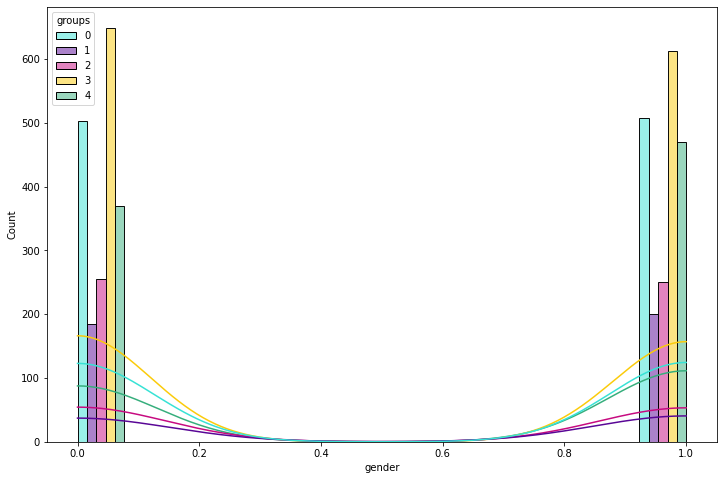

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


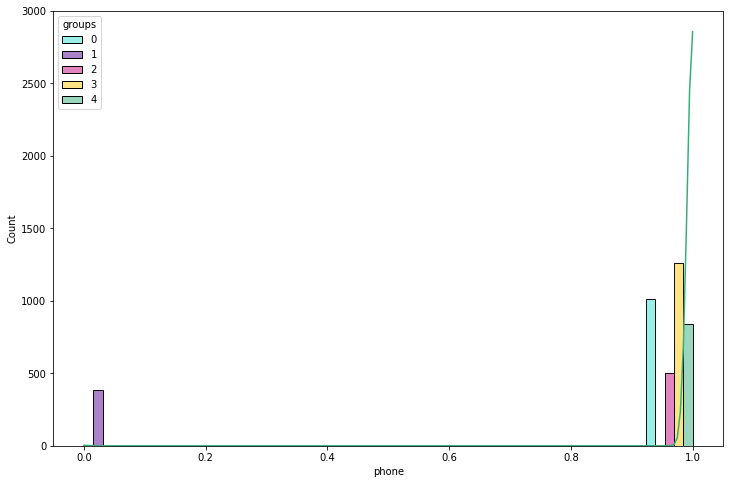

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


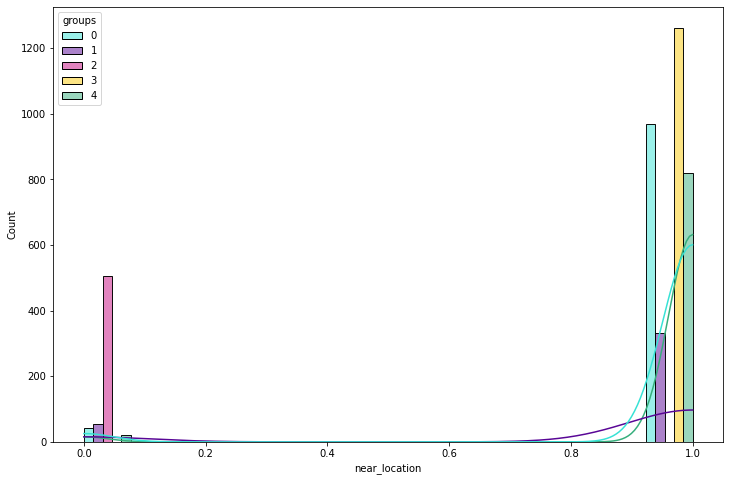

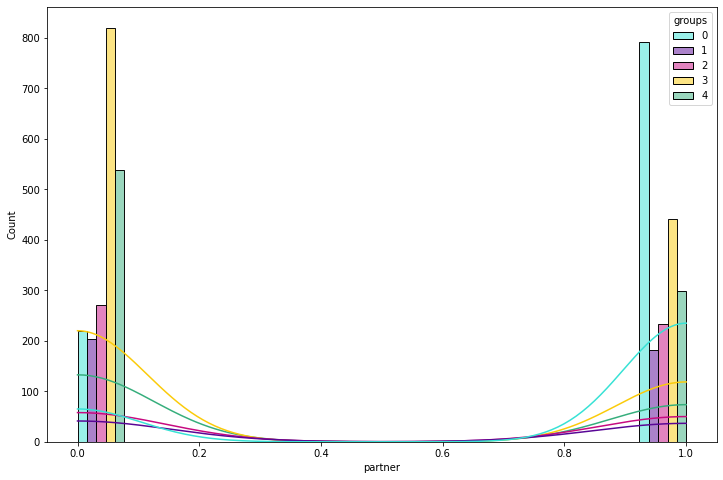

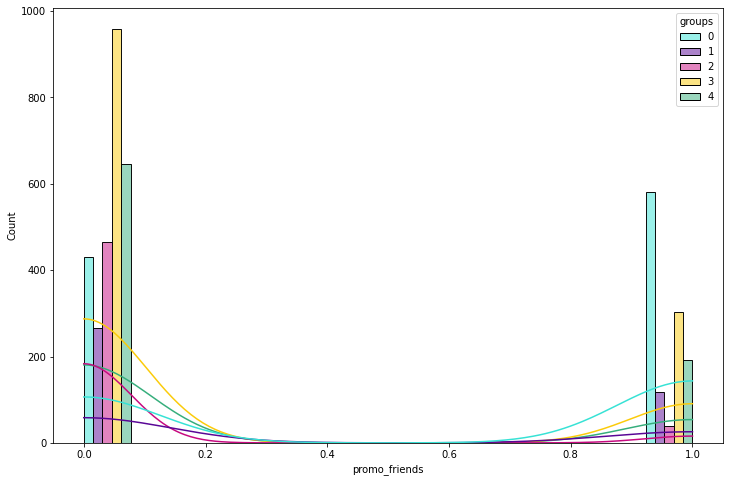

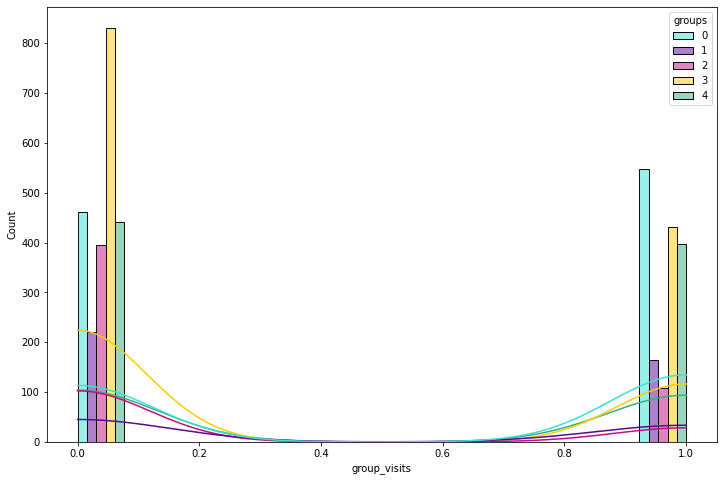

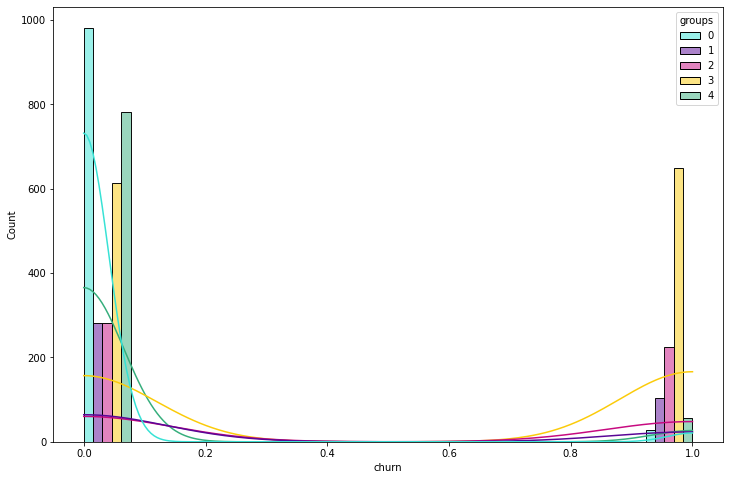

In [19]:
flatui = ["#37E2D5", "#590696", "#C70A80", "#FBCB0A", "#36AE7C"]

for name in data_bin.drop('groups', axis=1).columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(data=data, x=name,
                hue='groups', kde=True, multiple='dodge',
                palette=sns.color_palette(flatui));
    plt.show();

Здесь можно отметить несколько моментов:

    - Распределение по гендеру для всех кластеров действительно равномерно и примерно 50/50;
    - Доля оставивших номер телефона равна ~1 для всех кластеров кроме 1;
    - Близость к фитнес-центрам не вариьруется для 2 и 3 групп. Но в целом для всех групп кроме 2 величина равна 1;
    - В 0 кластере преобладают клиенты сотрудники партнерских компаний. Во 3 и 4 кластерах наоборот их меньше. В 1 и 2 -- поровну;
    - Во всех кластерах кроме 0 преобладают клиенты пришедшие по скидке "приведи друга";
    - 0, 1 и 4 кластеры посещали и не посещали групповые занятия 50/50. 2 и 3 больше не посещали;
    - 0 и 4 кластеры практически не уходят в отток, как мы и говорили. В 3 кластере уходит половина клиентов, во 1 и 2 так же уходит значительная часть клиентов. 

Интереснее посмотреть на не бинарные признаки -- их значения не так хорошо отображаются средними:

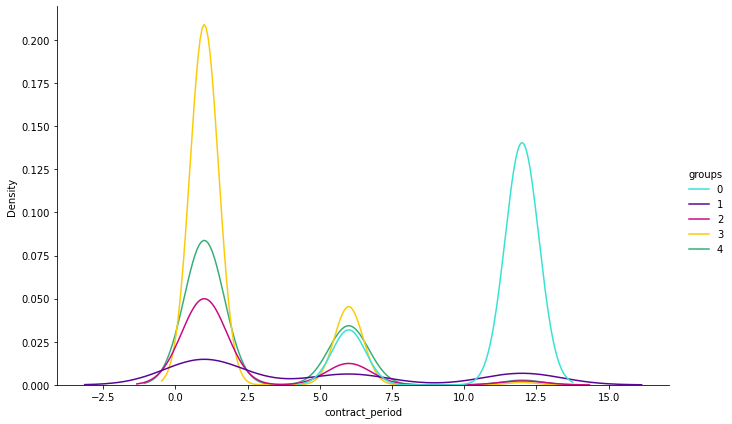

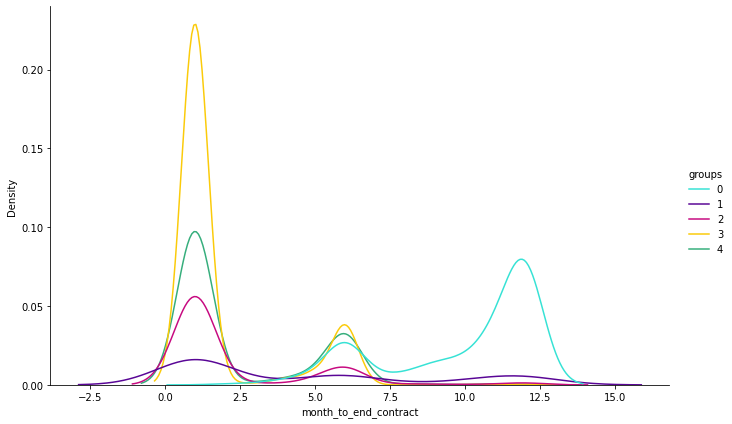

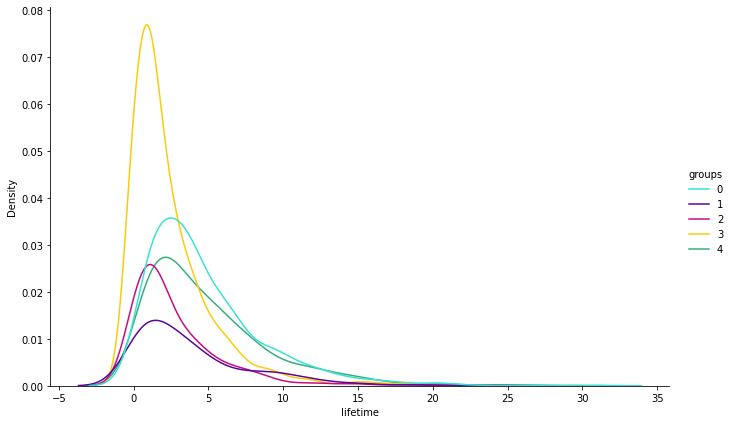

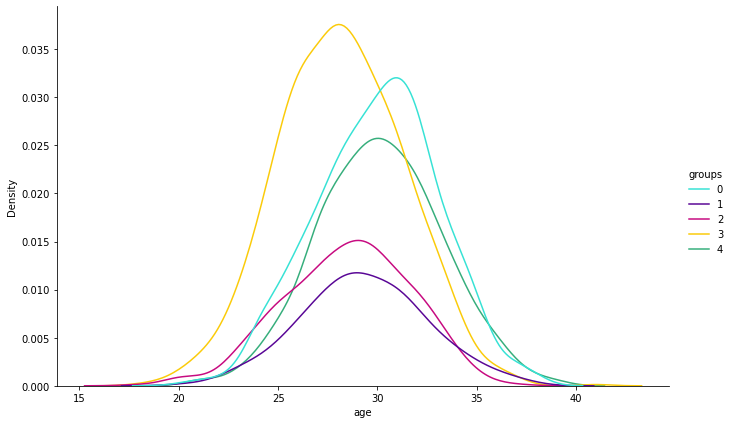

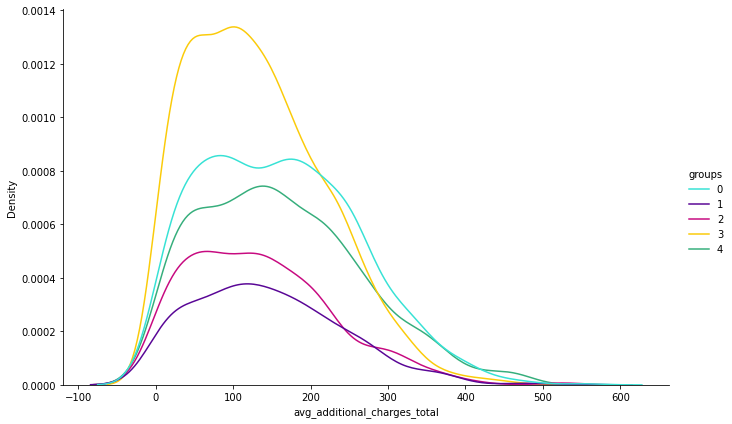

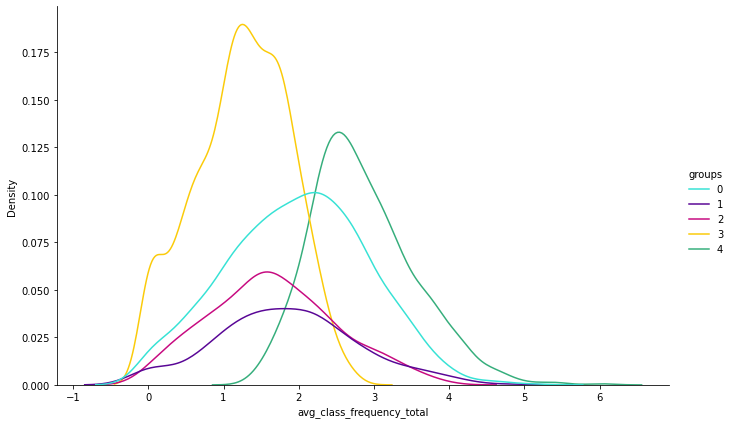

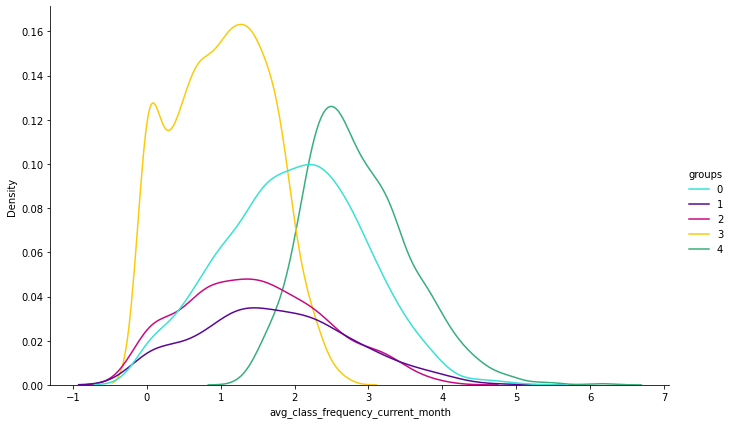

In [20]:
for name in data_kol.drop('groups', axis=1).columns:
    sns.displot(data=data, x=name,
                hue='groups', kind='kde',
                palette=sns.color_palette(flatui), 
                height=6, aspect=1.6);
    plt.show();

    - Распределения длительности абонемента и месяцев до конца его действия опять очень похожи. В 3 кластер попали большинство клиентов с 1-месячным абонементом, в 0 -- большинство с годовым. По остальным кластерам примерно одинаково распределены абонементы: 1-месячных больше всего, полугодовых -- в 2-3 раза меньше, годовых совсем мало;
    - Распределения лайфтайма похожи для всех кластеров. У всех из них есть пики в районе 1-2 месяцев, но у 3 кластера пик значительно выше -- там в основном расположены "короткие" клиенты. В 0 и 4 кластерах пик чуть правее, и они в целом содержат основную массу клиентов с лайфтаймом выше полугода и даже года.
    - Все распределения по возрасту очень близки к нормальному. При этом кроме 3 кластера все чуть смещены вправо -- их клиенты чуть старше;
    - Распределения по тратам действительно очень похожи для всех кластеров. Для 3 оно выше -- потому что в него попало больше клиентов;
    - Распределения посещаемости снова похожи. В 3 группе клиенты практически не посещали занятия. Во 1 и 2 кластерах посещали чуть чаще, а в 0 и 4 -- посещали чаще всего, причем в 4 клиенты посетили как минимум 1 занятие.

### Вывод

В целом кластеризация подтвердила то, что мы видели раннее. У нас появилось 5 кластеров с такими типажами клиентов:

    - 0 кластер: оставляют номер телефона, близко к фитнес-центрам, партнерская скидка, не использовали промокод, длинные абонементы, лайфтайм, посещаемость нормально распределена вокруг 2. Практически не уходят в отток;
    
    - 1 кластер: не оставляют номер телефона, близко к фитнес-центрам, посещаемость нормально распределена вокруг 1-2. Четверть уходит в отток;

    - 2 кластер: оставляют номер телефона, далеко от фитнес-центров, меньше посещали групповые занятия, посещаемость нормально распределена вокруг 1-2. Почти половина уходит в отток.

    - 3 кластер: оставляют номер телефона, близко к фитнес-центрам, меньше посещали групповые занятия, короткие абонементы и лайфтайм, клиенты младше, малая посещаемость, меньше пользуются партнерскаими скидками. Половина уходит в отток;    

    - 4 кластер: оставляют номер телефона, близко к фитнес-центрам, меньше пользуются партнерскими скидками, самая высокая посещаемость. Практически не уходят в отток.
    
В итоге мы видим, что о клиентах с высокой посещаемостью, длинными абонементами и близким расположением беспокоиться не стоит. А вот более молодые клиенты с короткими абонементами, очень малой посещаемостью и далеким расположением зачастую перестают посещать фитнес-центры. Как и о тех кто не оставляет номер телефона -- впрочем это закономерно.

## Общий вывод

В целом несколькими методами мы нашли признаки, наиболее влияющие на отток клиентов:

    1) Клиенты с одномесячным абонементом скорее перестанет посещать центр. Возможно стоит сделать привлекательные скидки на длинные абонементы;
    1.0) Да и в целом мы видим, если клиент стал постоянным -- он скорее останется. Нужно наращивать количество постоянных клиентов;
    2) Чем чаще клиент посещает занятия, тем скорее останется. Стоит напоминать клиентам о себе, можно присылать интересные для клиента занятия, предлагать новые идеи и услуги, можно устраивать временные акции, привлекающие уже купивших абонемент клиентов к посещению;
    3) Более молодые клиенты чаще уходят в отток. Это может быть связано с многими причинами -- возможно у них еще не настроена рутина или их почему-то не привлекают занятия в нашем центре. Стоит провести дополнительное исследование, чтобы найти способы привлечь их в фитнес-центр;
    4) При прочих равных близость расположения все же привлекает клиентов. Возможно стоит провести исследование рынка и найти, чем мы можем выделиться по услугам, чтобы быть в приоритете у клиентов по сравнению с фитнес-центрам ближе к ним.
    5) Клиент оставивший номер телефона скорее останется -- это может быть корреляцией а не каузация, но все же имеет смысл сделать номер телефона обязательным в анкете, ведь большинство все равно его отсавляет.